In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm  # Corrected import
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/cardio_train2 - updated_file_2.csv.csv')

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393.0,2.0,168.0,62.0,110.0,80.0,normal,normal,0.0,0.0,1.0,0.0
1,1,20228.0,1.0,156.0,85.0,140.0,90.0,well above normal,normal,0.0,0.0,1.0,1.0
2,2,18857.0,1.0,165.0,64.0,130.0,70.0,well above normal,normal,0.0,0.0,0.0,1.0
3,3,17623.0,2.0,169.0,82.0,150.0,100.0,normal,normal,0.0,0.0,1.0,1.0
4,4,17474.0,1.0,156.0,56.0,100.0,60.0,normal,normal,0.0,0.0,0.0,0.0


In [ ]:
print("Number of data points:", df.size)

Number of data points: 910000


In [ ]:
print(f"there are {df.shape[1]} feature in the dataset")
print(f"there are {df.shape[0]} rows in the dataset")
print(f"there are {df.size} datapoints")
print("binary classificatiobn problem. beacause we are predicting two level from the feature")

there are 13 feature in the dataset
there are 70000 rows in the dataset
there are 910000 datapoints
binary classificatiobn problem. beacause we are predicting two level from the feature


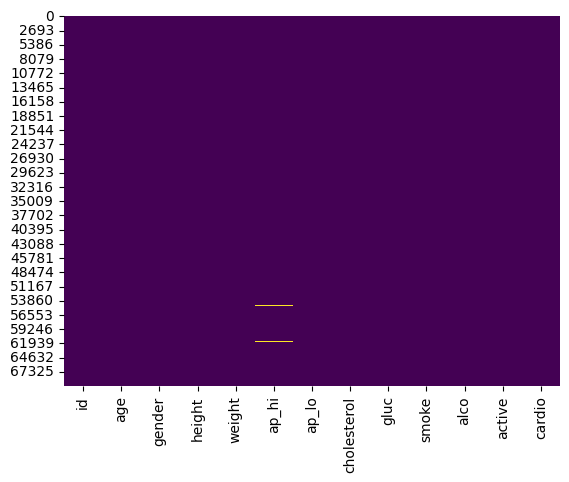

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
df["cardio"].value_counts()

,count
cardio,
0.0,34964
1.0,34932


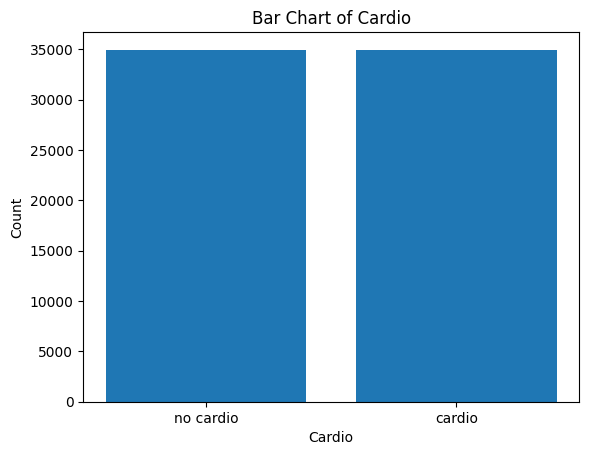

In [ ]:
# Count the values in the "cardio" column
cardio_counts = df["cardio"].value_counts()

# Define labels and values
labels = ["no cardio", "cardio"]
values = [cardio_counts[0], cardio_counts[1]]

# Plot the bar chart
plt.bar(labels, values)
plt.xlabel("Cardio")
plt.ylabel("Count")
plt.title("Bar Chart of Cardio")
plt.show()

In [ ]:
df.dtypes

,0
id,int64
age,float64
gender,float64
height,float64
weight,float64
ap_hi,float64
ap_lo,float64
cholesterol,object
gluc,object
smoke,float64


In [ ]:
df.isnull().sum()

,0
id,0
age,89
gender,76
height,74
weight,92
ap_hi,76
ap_lo,70
cholesterol,88
gluc,87
smoke,78


In [ ]:
# Calculate the total number of rows
total_rows = len(df)

# Calculate the number of rows with at least one null value
rows_with_nulls = df.isnull().any(axis=1).sum()

# Calculate the percentage of rows with null values
null_rows_percentage = (rows_with_nulls / total_rows) * 100

# Display results
print(f"Total Rows: {total_rows}")
print(f"Rows with Null Values: {rows_with_nulls}")
print(f"Percentage of Rows with Null Values: {null_rows_percentage:.2f}%")


Total Rows: 70000
Rows with Null Values: 1001
Percentage of Rows with Null Values: 1.43%


In [ ]:
df_cleaned = df.dropna()
# Calculate the total number of rows after removal
total_rows_after = len(df_cleaned)
# Display results
print(f"Total Rows Before Removal: {total_rows}")
print(f"Total Rows After Removal: {total_rows_after}")
print(f"Rows Removed: {total_rows - total_rows_after}")

Total Rows Before Removal: 70000
Total Rows After Removal: 68999
Rows Removed: 1001


In [ ]:
df_cleaned.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
# Identify non-numeric columns in the DataFrame
non_numeric_cols = df_cleaned.select_dtypes(include=['object']).columns

# Print non-numeric columns
print("Non-Numeric Columns:")
print(non_numeric_cols)


Non-Numeric Columns:
Index(['cholesterol', 'gluc'], dtype='object')


In [ ]:
# Display unique values in the 'cholesterol' column
print("Unique values in 'cholesterol':")
print(df_cleaned['cholesterol'].unique())

# Display unique values in the 'gluc' column
print("\nUnique values in 'gluc':")
print(df_cleaned['gluc'].unique())


Unique values in 'cholesterol':
['normal' 'well above normal' 'above normal']

Unique values in 'gluc':
['normal' 'above normal' 'well above normal']


In [ ]:
# Define mappings for cholesterol and gluc
mapping = {
    'normal': 1,
    'above normal': 2,
    'well above normal': 3
}

# Apply the mapping to the 'cholesterol' column
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].map(mapping)

# Apply the mapping to the 'gluc' column
df_cleaned['gluc'] = df_cleaned['gluc'].map(mapping)

# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(df_cleaned.head())



Updated DataFrame:
   id      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0   0  18393.0     2.0   168.0    62.0  110.0   80.0            1     1   
1   1  20228.0     1.0   156.0    85.0  140.0   90.0            3     1   
2   2  18857.0     1.0   165.0    64.0  130.0   70.0            3     1   
3   3  17623.0     2.0   169.0    82.0  150.0  100.0            1     1   
4   4  17474.0     1.0   156.0    56.0  100.0   60.0            1     1   

   smoke  alco  active  cardio  
0    0.0   0.0     1.0     0.0  
1    0.0   0.0     1.0     1.0  
2    0.0   0.0     0.0     1.0  
3    0.0   0.0     1.0     1.0  
4    0.0   0.0     0.0     0.0  


<ipython-input-27-75dc723dda70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cholesterol'] = df_cleaned['cholesterol'].map(mapping)
<ipython-input-27-75dc723dda70>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['gluc'] = df_cleaned['gluc'].map(mapping)


In [ ]:
df_cleaned.dtypes

,0
id,int64
age,float64
gender,float64
height,float64
weight,float64
ap_hi,float64
ap_lo,float64
cholesterol,int64
gluc,int64
smoke,float64


In [ ]:
df_cleaned["cardio"].value_counts()

,count
cardio,
0.0,34523
1.0,34476


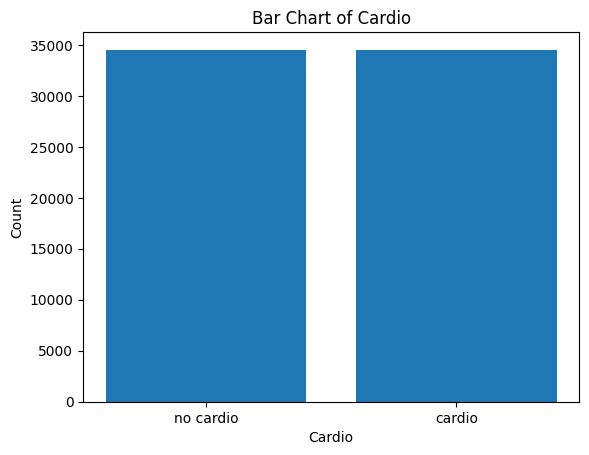

In [ ]:
# Count the values in the "cardio" column
cardio_counts = df_cleaned["cardio"].value_counts()

# Define labels and values
labels = ["no cardio", "cardio"]
values = [cardio_counts[0], cardio_counts[1]]

# Plot the bar chart
plt.bar(labels, values)
plt.xlabel("Cardio")
plt.ylabel("Count")
plt.title("Bar Chart of Cardio")
plt.show()

In [ ]:
# Convert 'age' from days to years
df_cleaned['age'] = (df_cleaned['age'] / 365).round(2)

# Display the updated DataFrame
print("Updated DataFrame with Age in Years:")
print(df_cleaned.head())


Updated DataFrame with Age in Years:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.39     2.0   168.0    62.0  110.0   80.0            1     1    0.0   
1   1  55.42     1.0   156.0    85.0  140.0   90.0            3     1    0.0   
2   2  51.66     1.0   165.0    64.0  130.0   70.0            3     1    0.0   
3   3  48.28     2.0   169.0    82.0  150.0  100.0            1     1    0.0   
4   4  47.87     1.0   156.0    56.0  100.0   60.0            1     1    0.0   

   alco  active  cardio  
0   0.0     1.0     0.0  
1   0.0     1.0     1.0  
2   0.0     0.0     1.0  
3   0.0     1.0     1.0  
4   0.0     0.0     0.0  


<ipython-input-31-8671f80f3585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age'] = (df_cleaned['age'] / 365).round(2)


In [ ]:
# Remove the 'id' column from the dataset
df_n = df_cleaned.drop(columns=['id'])

# Display the updated DataFrame
print("Updated DataFrame after removing 'id' column:")
print(df_n.head())


Updated DataFrame after removing 'id' column:
     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  50.39     2.0   168.0    62.0  110.0   80.0            1     1    0.0   
1  55.42     1.0   156.0    85.0  140.0   90.0            3     1    0.0   
2  51.66     1.0   165.0    64.0  130.0   70.0            3     1    0.0   
3  48.28     2.0   169.0    82.0  150.0  100.0            1     1    0.0   
4  47.87     1.0   156.0    56.0  100.0   60.0            1     1    0.0   

   alco  active  cardio  
0   0.0     1.0     0.0  
1   0.0     1.0     1.0  
2   0.0     0.0     1.0  
3   0.0     1.0     1.0  
4   0.0     0.0     0.0  


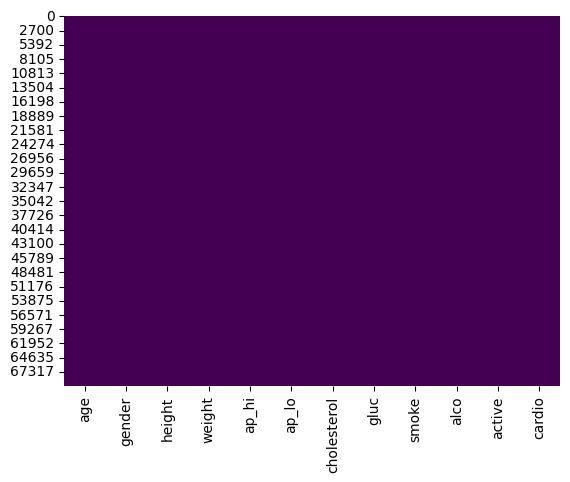

In [ ]:

sns.heatmap(df_n.isnull(), cbar=False, cmap='viridis')
plt.show()


In [ ]:
# Calculate variance for numeric features
variances = df_n.var()

# Display variances
print("Variance of Each Numeric Column:")
print(variances)

# Check for features with high variance differences
max_variance = variances.max()
min_variance = variances.min()

print(f"\nMaximum Variance: {max_variance}")
print(f"Minimum Variance: {min_variance}")



Variance of Each Numeric Column:
age               45.715686
gender             0.227370
height            67.401288
weight           206.741383
ap_hi          24058.416856
ap_lo          35935.071788
cholesterol        0.463441
gluc               0.328249
smoke              0.080437
alco               0.050879
active             0.157808
cardio             0.250004
dtype: float64

Maximum Variance: 35935.071787599096
Minimum Variance: 0.05087853849092675


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features to scale (exclude binary/categorical features)
features_to_scale = ['age','height','weight', 'ap_hi', 'ap_lo']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df_n[features_to_scale] = scaler.fit_transform(df_n[features_to_scale])

# Display the updated DataFrame
print("DataFrame after Scaling:")
print(df_n.head())


DataFrame after Scaling:
        age  gender    height    weight     ap_hi     ap_lo  cholesterol  \
0 -0.436376     2.0  0.443077 -0.848521 -0.121484 -0.088300            1   
1  0.307565     1.0 -1.018596  0.751100  0.071931 -0.035547            3   
2 -0.248542     1.0  0.077659 -0.709424  0.007460 -0.141052            3   
3 -0.748446     2.0  0.564883  0.542454  0.136403  0.017206            1   
4 -0.809086     1.0 -1.018596 -1.265814 -0.185956 -0.193805            1   

   gluc  smoke  alco  active  cardio  
0     1    0.0   0.0     1.0     0.0  
1     1    0.0   0.0     1.0     1.0  
2     1    0.0   0.0     0.0     1.0  
3     1    0.0   0.0     1.0     1.0  
4     1    0.0   0.0     0.0     0.0  


In [ ]:
# Calculate variance for numeric features
variances = df_n.var()

# Display variances
print("Variance of Each Numeric Column:")
print(variances)

# Check for features with high variance differences
max_variance = variances.max()
min_variance = variances.min()

print(f"\nMaximum Variance: {max_variance}")
print(f"Minimum Variance: {min_variance}")



Variance of Each Numeric Column:
age            1.000014
gender         0.227370
height         1.000014
weight         1.000014
ap_hi          1.000014
ap_lo          1.000014
cholesterol    0.463441
gluc           0.328249
smoke          0.080437
alco           0.050879
active         0.157808
cardio         0.250004
dtype: float64

Maximum Variance: 1.000014493173905
Minimum Variance: 0.05087853849092675


<Axes: xlabel='cardio', ylabel='count'>

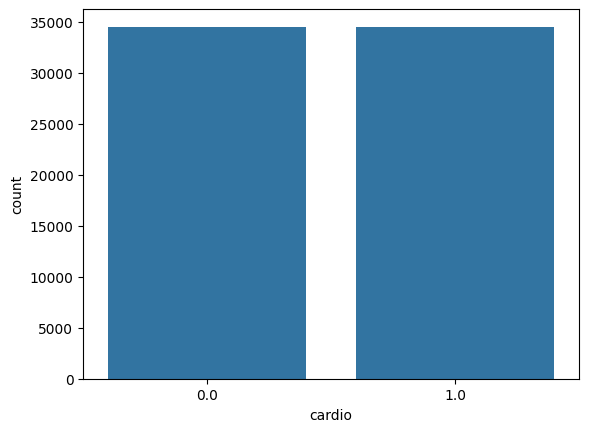

In [ ]:
sns.countplot(x="cardio", data=df_n)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import StandardScaler

# Split the data
x = df_n.drop(columns="cardio")
y = df_n["cardio"]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

# Scale the data (for Logistic Regression, KNN, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define classifiers
classifiers = [
    LogisticRegression(),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(probability=True)  # Support Vector Classifier
]
clf_accuracies = {}

# Train and evaluate each classifier
for model in classifiers:
    if isinstance(model, GaussianNB):  # GaussianNB doesn't require scaling
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, Y_train)  # Train the model on scaled data
        y_pred = model.predict(X_test_scaled)  # Predict on scaled test data

    accuracy = acc(Y_test, y_pred)  # Calculate accuracy
    clf_accuracies[type(model).__name__] = round(accuracy, 2)  # Store the accuracy

# Print the accuracies
print("Classifier Accuracies:")
for clf, acc_value in clf_accuracies.items():
    print(f"{clf}: {acc_value}")


Classifier Accuracies:
LogisticRegression: 0.72
GaussianNB: 0.59
RandomForestClassifier: 0.71
KNeighborsClassifier: 0.65
DecisionTreeClassifier: 0.63
SVC: 0.73


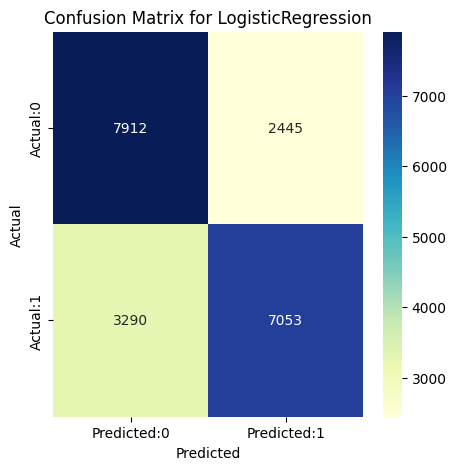

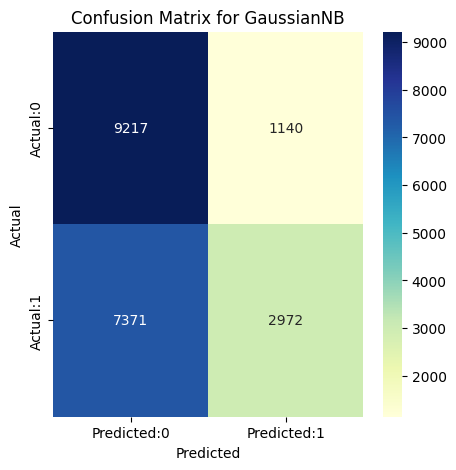

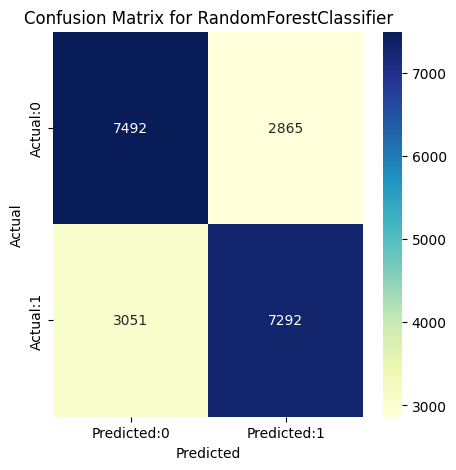

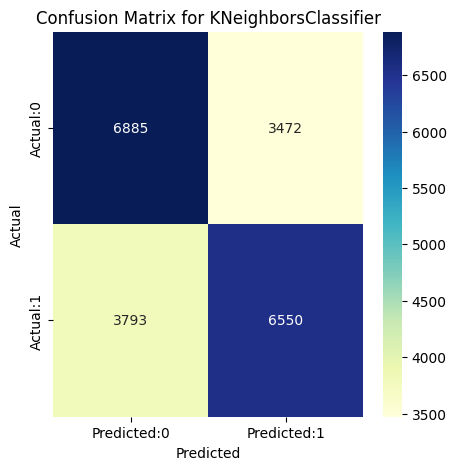

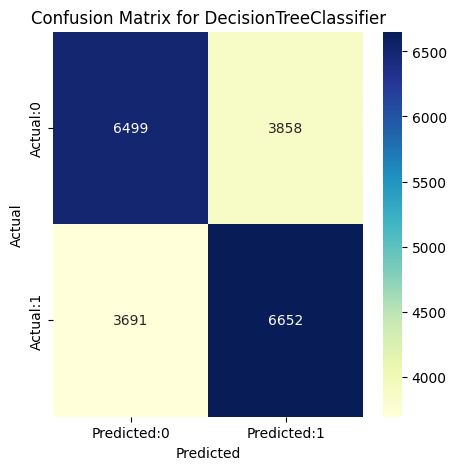

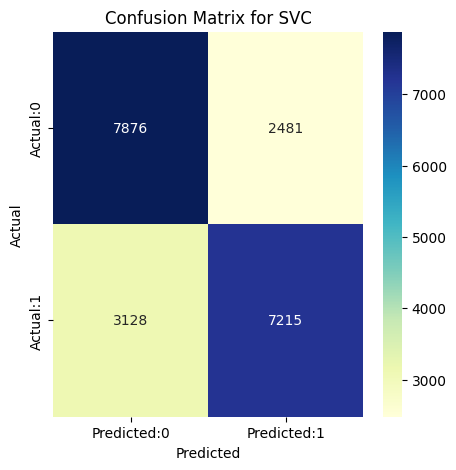

In [ ]:
from sklearn.metrics import confusion_matrix

# Train, evaluate, and plot confusion matrix f or each classifier
for model in classifiers:
    if isinstance(model, GaussianNB):  # GaussianNB doesn't require scaling
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, Y_train)  # Train the model on scaled data
        y_pred = model.predict(X_test_scaled)  # Predict on scaled test data

    # Generate confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    conf_matrix = pd.DataFrame(
        data=cm,
        columns=['Predicted:0', 'Predicted:1'],
        index=['Actual:0', 'Actual:1']
    )

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix for {type(model).__name__}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


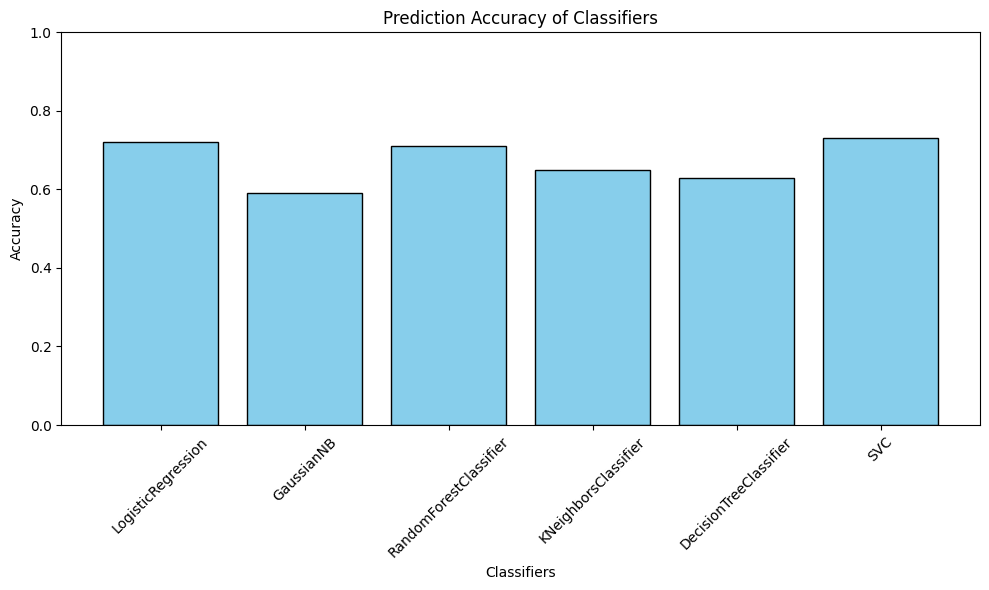

In [ ]:
# Plot bar chart for classifier accuracies
plt.figure(figsize=(10, 6))
plt.bar(clf_accuracies.keys(), clf_accuracies.values(), color='skyblue', edgecolor='black')
plt.title("Prediction Accuracy of Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to display accuracy as a percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Dictionary to store precision and recall for each model
clf_metrics = {}

# Train and evaluate each classifier
for model in classifiers:
    if isinstance(model, GaussianNB):  # GaussianNB doesn't require scaling
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, Y_train)  # Train the model on scaled data
        y_pred = model.predict(X_test_scaled)  # Predict on scaled test data

    # Calculate accuracy, precision, and recall
    accuracy = acc(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='binary')  # Change 'binary' to 'weighted' for multi-class
    recall = recall_score(Y_test, y_pred, average='binary')        # Change 'binary' to 'weighted' for multi-class

    # Store the metrics
    clf_metrics[type(model).__name__] = {
        'Accuracy': round(accuracy, 2),
        'Precision': round(precision, 2),
        'Recall': round(recall, 2)
    }

# Print the metrics for each model
print("Classifier Metrics:")
for clf, metrics in clf_metrics.items():
    print(f"{clf}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


Classifier Metrics:
LogisticRegression:
  Accuracy: 0.72
  Precision: 0.74
  Recall: 0.68
GaussianNB:
  Accuracy: 0.59
  Precision: 0.72
  Recall: 0.29
RandomForestClassifier:
  Accuracy: 0.72
  Precision: 0.72
  Recall: 0.71
KNeighborsClassifier:
  Accuracy: 0.65
  Precision: 0.65
  Recall: 0.63
DecisionTreeClassifier:
  Accuracy: 0.64
  Precision: 0.64
  Recall: 0.64
SVC:
  Accuracy: 0.73
  Precision: 0.74
  Recall: 0.7


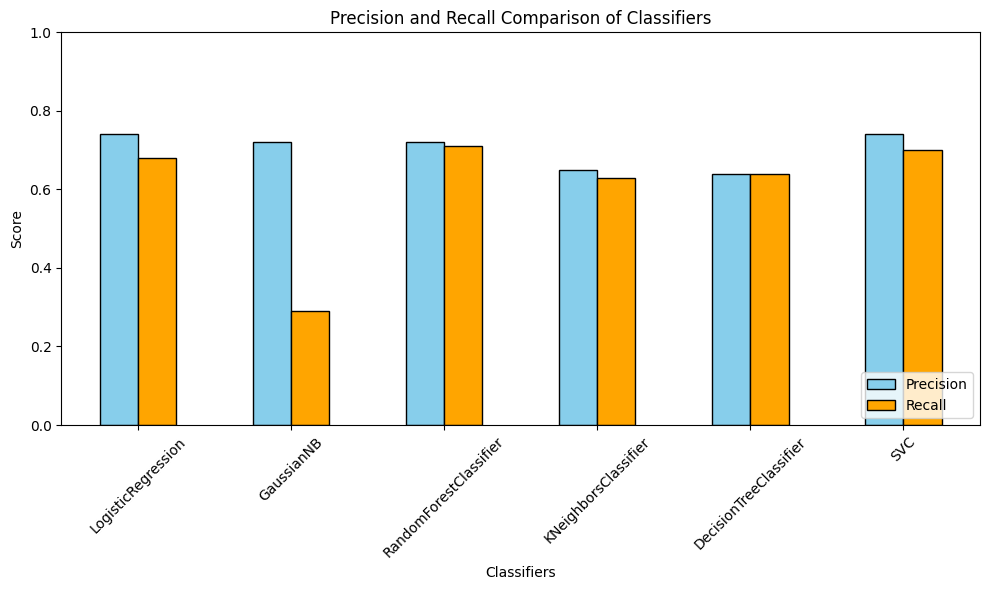

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(clf_metrics, orient='index')

# Plot precision and recall for each model
metrics_df[['Precision', 'Recall']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'], edgecolor='black')
plt.title("Precision and Recall Comparison of Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set y-axis limit to 0-1
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
dfn_with_1=df_n[df_n['cardio']==1]
dfn_with_0=df_n[df_n['cardio']==0]

In [ ]:
reduce_samp_1=dfn_with_1.sample(n=2000, replace=False)
reduce_samp_0=dfn_with_0.sample(n=2000,replace=False)
df_f=pd.concat([reduce_samp_1,reduce_samp_0])
df_f=df_f.sample(frac=1)
df_f["cardio"].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as acc

# Split the data
x = df_f.drop("cardio", axis=1)
y = df_f["cardio"]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

# Scale the data (for Logistic Regression, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    GaussianNB()
]
clf_accuracies = {}

# Train and evaluate each classifier
for model in classifiers:
    if isinstance(model, GaussianNB):  # GaussianNB doesn't require scaling
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, Y_train)  # Train the model on scaled data
        y_pred = model.predict(X_test_scaled)  # Predict on scaled test data

    accuracy = acc(Y_test, y_pred)  # Calculate accuracy
    clf_accuracies[type(model).__name__] = round(accuracy, 2)  # Store the accuracy

# Print the accuracies
print("Classifier Accuracies:")
for clf, acc_value in clf_accuracies.items():
    print(f"{clf}: {acc_value}")
